# Sentiment Analysis using NLP Part 2

### Group S2 - 2
- Alfred George (W0783363)
- Deepa Taneja Chawla (W0774178)
- NikulKumar Devataja (W0781660)
- Prathap David Carlo (W0787017)
- Rajesh Gandham (W0783532)

In [3]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [4]:
#!pip install nltk

In [5]:
import warnings
warnings.filterwarnings("ignore")
# Clean the text by removing any extra characters 
import re # tools for cleaning text
import nltk # library to perform NLP
nltk.download('stopwords') # tool to remove the non-essential words. It is a list of words
nltk.download('words')
from nltk.corpus import stopwords
# Stemming means taking the root of the word such as love from loved or loving
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, plot_roc_curve, classification_report
import seaborn as sns

In [7]:
from google.colab import drive
drive.mount('/content/drive')
from pathlib import Path
p = Path('/content/drive/MyDrive/Colab Notebooks/')


Mounted at /content/drive


In [8]:
# Read the file
tweets = pd.read_csv(p/"Tweets.csv")

In [9]:
# Find the shape
tweets.shape

(14640, 15)

In [10]:
# Have a quick look at the dataset
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [11]:
tweets.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [12]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [13]:
tweets['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

## Perform Exploratory Analysis

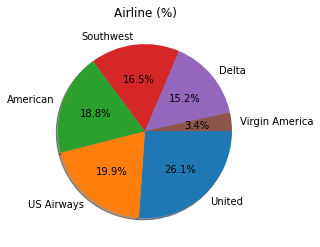

In [14]:
# Create a pie chart by airline %
plt.pie(tweets['airline'].value_counts(),labels=tweets['airline'].value_counts().index,
autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Airline (%)')
plt.show()

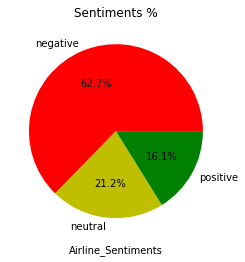

In [15]:
# Create a pie chart by airline sentiment
c=['r', 'y', 'g']
plt.pie(tweets['airline_sentiment'].value_counts(), labels=tweets['airline_sentiment'].value_counts().index, autopct='%1.1f%%',colors=c,
counterclock=True, shadow=False)
plt.title('Sentiments %')
plt.xlabel('Airline_Sentiments')
plt.show()

[Text(0.5, 1.0, 'Airline - Sentiments Distribution')]

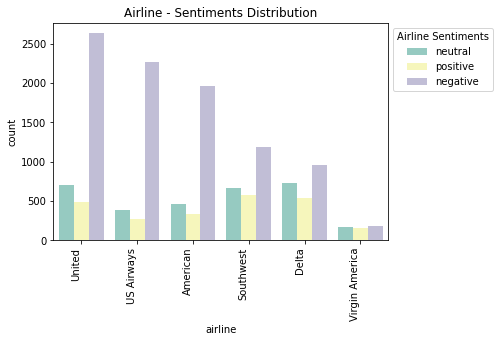

In [16]:
# Create a bar chart by airline and airline sentiment
p = sns.countplot(data=tweets, x='airline', hue='airline_sentiment',palette="Set3",order=tweets['airline'].value_counts().index)
p.set_xticklabels(p.get_xticklabels(), rotation=90, horizontalalignment='right')
p.legend(title='Airline Sentiments', bbox_to_anchor=(1, 1), loc='upper left')
p.set(title="Airline - Sentiments Distribution")

[Text(0.5, 1.0, 'Sentiments - Airline Sentiment Confidence Distribution')]

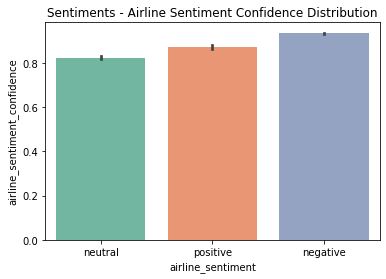

In [17]:
# Create a bar plot for airline sentiment and airline sentiment confidence
p=sns.barplot(x="airline_sentiment",y="airline_sentiment_confidence",data=tweets,palette="Set2")
p.set(title="Sentiments - Airline Sentiment Confidence Distribution")


In [18]:
# Create a new dataframe that will only have 2 relevant columns
# Identify the 2 columns
# For airline_sentiment I only want to see positive and negative sentiments
# Remove the neutral sentiments from the dataframe

tweets_2 = tweets[['text', 'airline_sentiment']]
tweets_2 = tweets_2[tweets_2['airline_sentiment'] != 'neutral'].reset_index(drop=True)

In [19]:
#Your final dataframe should look like this
tweets_2.head()

,text,airline_sentiment
0,@VirginAmerica plus you've added commercials t...,positive
1,@VirginAmerica it's really aggressive to blast...,negative
2,@VirginAmerica and it's a really big bad thing...,negative
3,@VirginAmerica seriously would pay $30 a fligh...,negative
4,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [20]:
tweets_2.shape

(11541, 2)

### create the corpus

In [51]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
import string
nltk.download('punkt')
def create_corpus(data, length):
    corpus = [] # Build a new list for all the words from all the reviews
    # corpus is a collection of text and a common term used in NLP
    ps =PorterStemmer()
    stopword=set(stopwords.words('english'))
    for i in range (0, length):
        tokens = word_tokenize(data[i])
        # convert to lower case
        tokens = [w.lower() for w in tokens]
        # remove punctuation from each word
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove remaining tokens that are not alphabetic
        words = [word for word in stripped if word.isalpha()]
        # filter out stop words
        words = [w for w in words if not w in stopword]
        stemmed = [ps.stem(word) for word in words]
        words=' '.join(stemmed)
        corpus.append(words)
    return corpus

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [54]:
corpus2 = create_corpus(tweets_2['text'], 11541)


In [55]:
corpus2[:5]

['virginamerica plu ad commerci experi tacki',
 'virginamerica realli aggress blast obnoxi entertain guest face amp littl recours',
 'virginamerica realli big bad thing',
 'virginamerica serious would pay flight seat nt play realli bad thing fli va',
 'virginamerica ye nearli everi time fli vx ear worm go away']

In [56]:
np.unique(tweets_2[['airline_sentiment']].values)

array(['negative', 'positive'], dtype=object)

### Create bag of words model 

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

cv2 = CountVectorizer(max_features= 2500)# We restrict the words to 2500 which keeps the most frequent words
tweets_X = cv2.fit_transform(corpus2).toarray()# independent variables
tweets_X[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [58]:
tweets_X.shape

(11541, 2500)

In [59]:
tweets_y = tweets_2.iloc[:, 1].values # dependent variable (These are your sentiment values from the dataset)
tweets_y.shape

(11541,)

In [60]:
tweets_y

array(['positive', 'negative', 'negative', ..., 'positive', 'negative',
       'negative'], dtype=object)

In [61]:
print(cv2.get_feature_names())

['aa', 'aadvantag', 'aarp', 'abandon', 'abc', 'abil', 'abl', 'abq', 'absolut', 'absurd', 'abt', 'abysm', 'ac', 'accept', 'access', 'accid', 'accommod', 'accomplish', 'accord', 'account', 'acct', 'accur', 'acknowledg', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'add', 'addit', 'address', 'addtl', 'adjust', 'admir', 'admit', 'advanc', 'advantag', 'advertis', 'advic', 'advis', 'advisori', 'affect', 'afford', 'afternoon', 'age', 'agenc', 'agent', 'aggrav', 'aggress', 'ago', 'agre', 'agt', 'ah', 'ahead', 'ahold', 'air', 'airbu', 'aircanada', 'aircraft', 'airfar', 'airlin', 'airplan', 'airport', 'airway', 'aisl', 'aka', 'albani', 'alert', 'alist', 'aliv', 'allianc', 'allow', 'almost', 'alon', 'along', 'alot', 'alreadi', 'alright', 'also', 'altern', 'although', 'alway', 'amateur', 'amaz', 'america', 'american', 'americanair', 'americanairlin', 'amount', 'amp', 'angel', 'angri', 'anniversari', 'announc', 'annoy', 'anoth', 'answer', 'anthoni', 'anticip', 'anxiou', 'anybodi', 'anymor', 

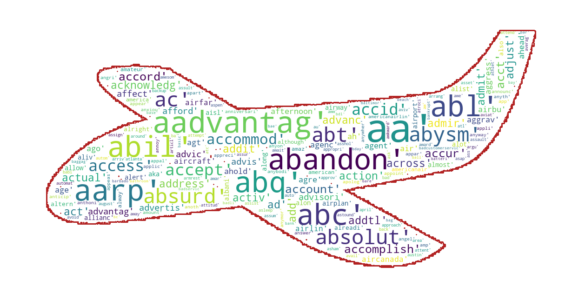

None


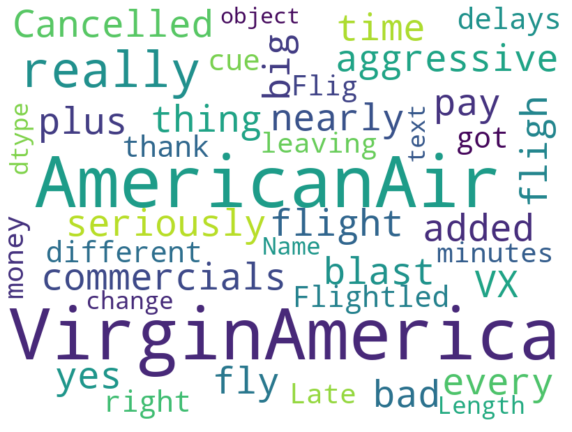

None


In [73]:
from PIL import Image
import re
from wordcloud import WordCloud, STOPWORDS
import os
def create_word_cloud(string):
    maskArray = np.array(Image.open(Path('/content/drive/MyDrive/Colab Notebooks/plane1.png')))
    cloud = WordCloud(background_color = "white", mask = maskArray, stopwords = STOPWORDS,contour_width=3, contour_color='firebrick')
    cloud.generate(string)
    cloud.to_file("word_plane.png")
    plt.figure(figsize=(10,10))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    print(plt.show())

    
create_word_cloud(str(cv2.get_feature_names()))

wc=WordCloud(background_color = "white", stopwords = STOPWORDS, height=600,width=800)
#wc.generate(str(cv2.get_feature_names()))
wc.generate(str(tweets_2['text']))
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

#Show the wordcloud
print(plt.show())

In [74]:
cv_dataframe=pd.DataFrame(list(cv2.vocabulary_.items()), columns=['word','freq'])
cv_dataframe.sort_values(by='freq',ascending=False).head()

,word,freq
971,zone,2499
2418,zkatcher,2498
973,zero,2497
1407,yyz,2496
1799,yvr,2495


### Apply Various Machine Learning Classification Models (all 5)



In [75]:
def create_nmodel(classifier,randomstate,data,y):
    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.20, random_state = randomstate)
    if classifier==1:
        classifier_model=GaussianNB()
    elif classifier==2:
        classifier_model=KNeighborsClassifier(n_neighbors = 2)
    elif classifier==3:
        classifier_model=SVC(kernel='linear', random_state=randomstate)
    elif classifier==4:
        classifier_model=DecisionTreeClassifier(random_state = randomstate)
    elif classifier==5:
        classifier_model=RandomForestClassifier(n_estimators=100,random_state = randomstate)
    
    # Fitting classifier to the Training set
    classifier_model.fit(X_train, y_train)
    
    # Predicting the Test set results 
    y_predict = classifier_model.predict(X_test)
    
    # Make the Confusion Matrix
    cm = confusion_matrix(y_test,y_predict)
    
    # Evaluate the results
    print("Confusion Matrix is : {}".format(cm))
    print("Accuracy Score is : {}".format(accuracy_score(y_test, y_predict)))
    print("F1 Score is : {}".format(f1_score(y_test, y_predict,pos_label="positive")))
    print("Recall_score is : {}".format(recall_score(y_test, y_predict,pos_label="positive")))
    print("Precision_score is :{}".format(precision_score(y_test, y_predict,pos_label="positive")))
    
    df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
    plt.figure(figsize = (10, 7))
    sns.heatmap(df_cm, annot = True, fmt ='g')
    print(plt.show)
    
    #print(y_test)
    
    ytest=[1 if x=="positive" else 0 for x in y_test]
    ypred=[1 if x=="positive" else 0 for x in y_predict]
   
    
    #print(ytest)
    
    #Calculating ROC/AUC the Results
    roc_auc_score(ytest, ypred)
    
    # adding ROC/AUC curve
    plot_roc_curve(classifier_model, X_test, y_test)
    
    print(classification_report(y_test, y_predict))

#### Naive Bayes Model

Confusion Matrix is : [[978 861]
 [ 96 374]]
Accuracy Score is : 0.5855348635773062
F1 Score is : 0.43870967741935485
Recall_score is : 0.7957446808510639
Precision_score is :0.302834008097166
<function show at 0x7f9e689f2cb0>
              precision    recall  f1-score   support

    negative       0.91      0.53      0.67      1839
    positive       0.30      0.80      0.44       470

    accuracy                           0.59      2309
   macro avg       0.61      0.66      0.56      2309
weighted avg       0.79      0.59      0.62      2309



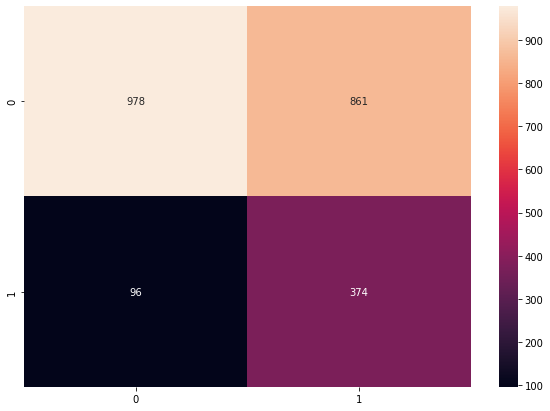

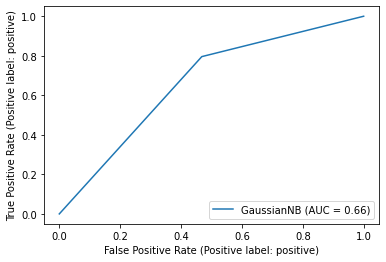

In [76]:
create_nmodel(1,0,tweets_X,tweets_y)

#### KNN Model

Confusion Matrix is : [[1610  196]
 [ 175  328]]
Accuracy Score is : 0.8393243828497184
F1 Score is : 0.6387536514118793
Recall_score is : 0.6520874751491054
Precision_score is :0.6259541984732825
<function show at 0x7f9e689f2cb0>
              precision    recall  f1-score   support

    negative       0.90      0.89      0.90      1806
    positive       0.63      0.65      0.64       503

    accuracy                           0.84      2309
   macro avg       0.76      0.77      0.77      2309
weighted avg       0.84      0.84      0.84      2309



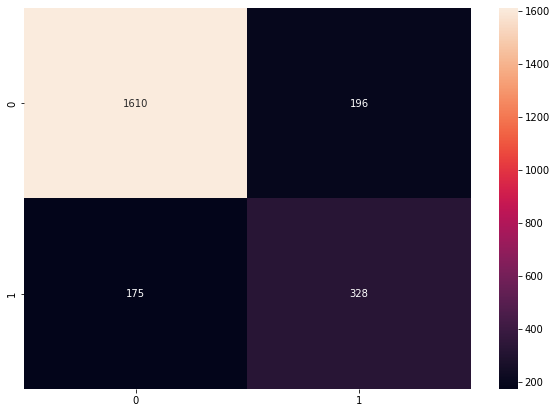

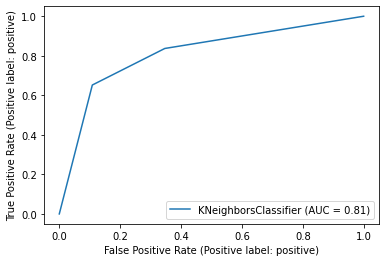

In [77]:
create_nmodel(2,143,tweets_X,tweets_y)

#### Support Vector Machine (SVM) Model

Confusion Matrix is : [[1771   85]
 [ 120  333]]
Accuracy Score is : 0.9112169770463404
F1 Score is : 0.7646383467278989
Recall_score is : 0.7350993377483444
Precision_score is :0.7966507177033493
<function show at 0x7f9e689f2cb0>
              precision    recall  f1-score   support

    negative       0.94      0.95      0.95      1856
    positive       0.80      0.74      0.76       453

    accuracy                           0.91      2309
   macro avg       0.87      0.84      0.85      2309
weighted avg       0.91      0.91      0.91      2309



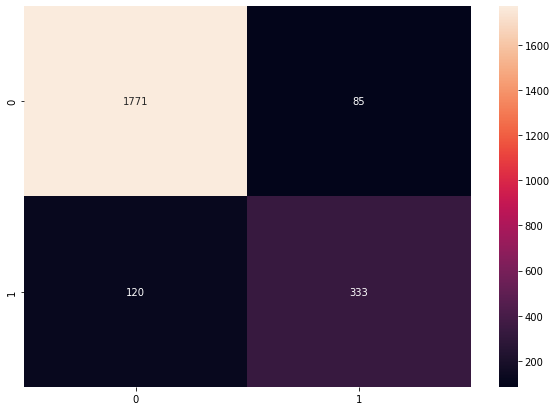

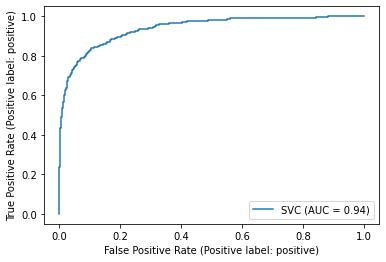

In [78]:
create_nmodel(3,256,tweets_X,tweets_y)

#### Decision Tree Model

Confusion Matrix is : [[1631  195]
 [ 169  314]]
Accuracy Score is : 0.8423559982676483
F1 Score is : 0.6330645161290323
Recall_score is : 0.650103519668737
Precision_score is :0.6168958742632613
<function show at 0x7f9e689f2cb0>
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      1826
    positive       0.62      0.65      0.63       483

    accuracy                           0.84      2309
   macro avg       0.76      0.77      0.77      2309
weighted avg       0.85      0.84      0.84      2309



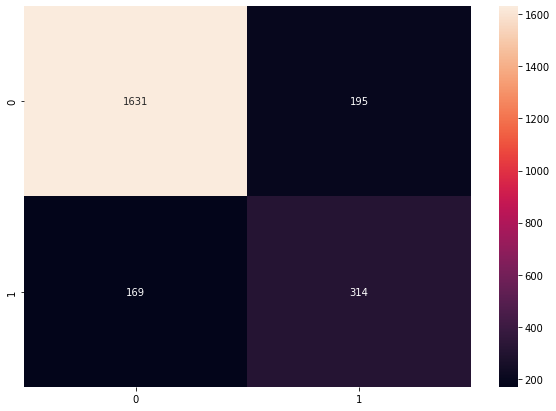

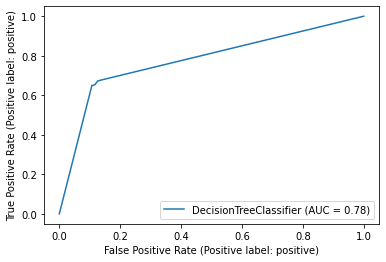

In [82]:
create_nmodel(4,156,tweets_X,tweets_y)

#### Random Forest Model

Confusion Matrix is : [[1767   72]
 [ 141  329]]
Accuracy Score is : 0.9077522737115634
F1 Score is : 0.7554535017221584
Recall_score is : 0.7
Precision_score is :0.8204488778054863
<function show at 0x7f9e689f2cb0>
              precision    recall  f1-score   support

    negative       0.93      0.96      0.94      1839
    positive       0.82      0.70      0.76       470

    accuracy                           0.91      2309
   macro avg       0.87      0.83      0.85      2309
weighted avg       0.90      0.91      0.90      2309



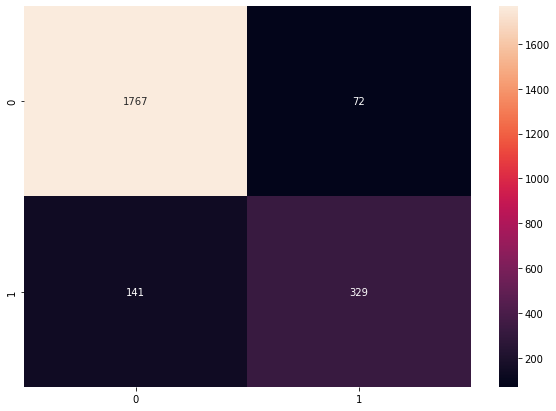

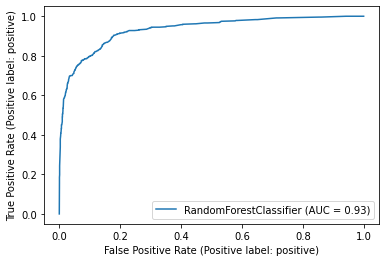

In [83]:
create_nmodel(5,0,tweets_X,tweets_y)

### Feature Extraction - TF-IDF

In [84]:
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
corpus3 = vectorizer.fit_transform(corpus2).toarray()
tX = corpus3
tX.shape

(11541, 1566)

#### Random Forest Model

Confusion Matrix is : [[1789   50]
 [ 161  309]]
Accuracy Score is : 0.9086184495452577
F1 Score is : 0.7454764776839565
Recall_score is : 0.6574468085106383
Precision_score is :0.8607242339832869
<function show at 0x7f9e689f2cb0>
              precision    recall  f1-score   support

    negative       0.92      0.97      0.94      1839
    positive       0.86      0.66      0.75       470

    accuracy                           0.91      2309
   macro avg       0.89      0.82      0.84      2309
weighted avg       0.91      0.91      0.90      2309



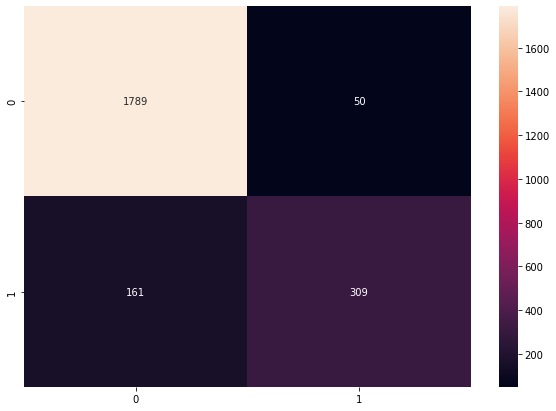

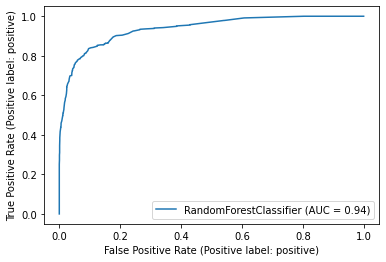

In [85]:
create_nmodel(5,0,tX,tweets_y)

#### Decision Tree Model

Confusion Matrix is : [[1678  148]
 [ 194  289]]
Accuracy Score is : 0.851883932438285
F1 Score is : 0.6282608695652174
Recall_score is : 0.598343685300207
Precision_score is :0.6613272311212814
<function show at 0x7f9e689f2cb0>
              precision    recall  f1-score   support

    negative       0.90      0.92      0.91      1826
    positive       0.66      0.60      0.63       483

    accuracy                           0.85      2309
   macro avg       0.78      0.76      0.77      2309
weighted avg       0.85      0.85      0.85      2309



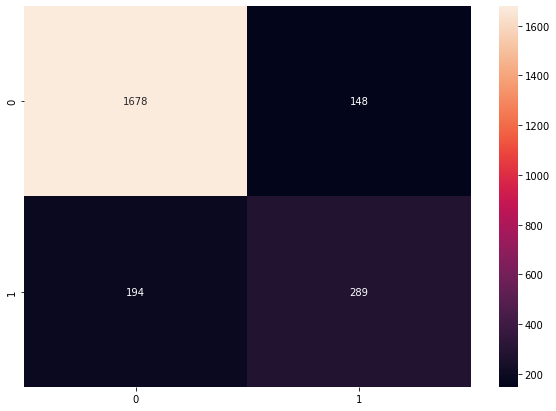

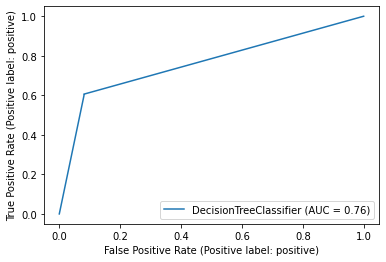

In [86]:
create_nmodel(4,156,tX,tweets_y)

#### Support Vector Machine (SVM) Model

Confusion Matrix is : [[1793   63]
 [ 141  312]]
Accuracy Score is : 0.9116500649631876
F1 Score is : 0.7536231884057972
Recall_score is : 0.6887417218543046
Precision_score is :0.832
<function show at 0x7f9e689f2cb0>
              precision    recall  f1-score   support

    negative       0.93      0.97      0.95      1856
    positive       0.83      0.69      0.75       453

    accuracy                           0.91      2309
   macro avg       0.88      0.83      0.85      2309
weighted avg       0.91      0.91      0.91      2309



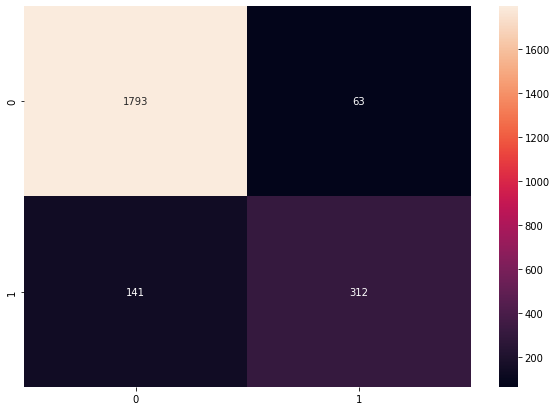

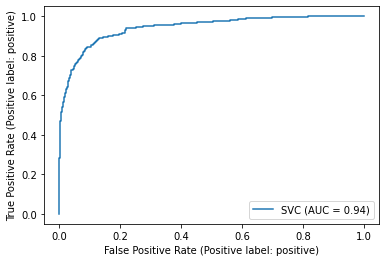

In [87]:
create_nmodel(3,256,tX,tweets_y)

#### KNN Model

Confusion Matrix is : [[1710   96]
 [ 245  258]]
Accuracy Score is : 0.8523170203551321
F1 Score is : 0.602100350058343
Recall_score is : 0.5129224652087475
Precision_score is :0.7288135593220338
<function show at 0x7f9e689f2cb0>
              precision    recall  f1-score   support

    negative       0.87      0.95      0.91      1806
    positive       0.73      0.51      0.60       503

    accuracy                           0.85      2309
   macro avg       0.80      0.73      0.76      2309
weighted avg       0.84      0.85      0.84      2309



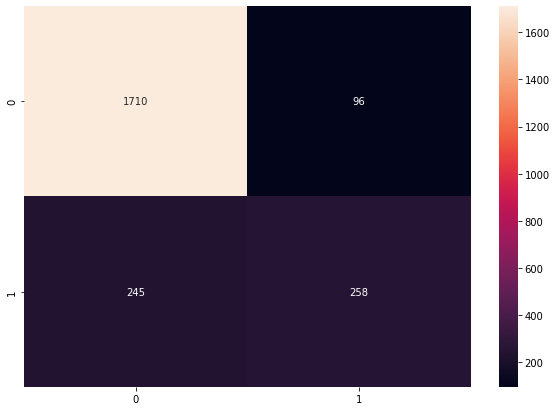

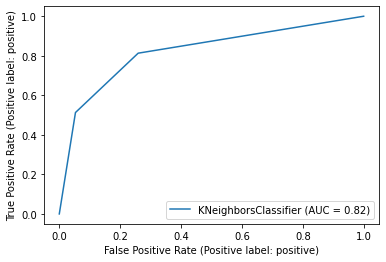

In [88]:
create_nmodel(2,143,tX,tweets_y)

#### Naive Bayes Model

Confusion Matrix is : [[846 993]
 [ 64 406]]
Accuracy Score is : 0.5422260718925942
F1 Score is : 0.4344569288389513
Recall_score is : 0.8638297872340426
Precision_score is :0.2902072909220872
<function show at 0x7f9e689f2cb0>
              precision    recall  f1-score   support

    negative       0.93      0.46      0.62      1839
    positive       0.29      0.86      0.43       470

    accuracy                           0.54      2309
   macro avg       0.61      0.66      0.52      2309
weighted avg       0.80      0.54      0.58      2309



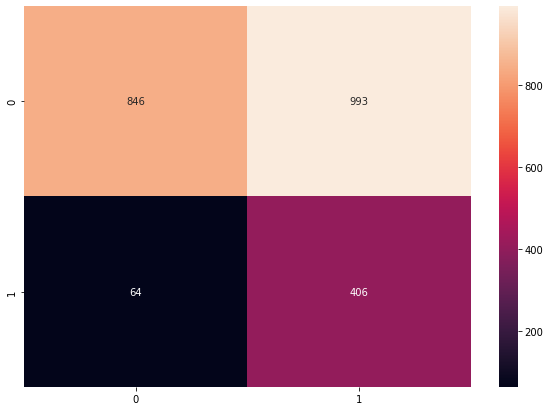

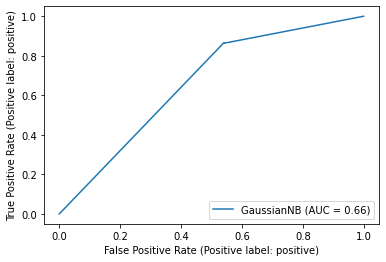

In [89]:
create_nmodel(1,0,tX,tweets_y)

#### Evaluate the performance of each of these models. Create a table to highlight the differences across both the approaches.

|# | Model | Accuracy  | F1 Score | ROC_AUC Score |TF-IDF Accuracy Score | TF-IDF - F1 Score |  TF-IDF -   ROC_AUC Score|
|-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 1 | Naïve Bayes Model | 0.58 | 0.43 |0.66 | 0.54 | 0.43| 0.66 |
| 2 | K-Nearest Neighbors (KNN) | 0.83 | 0.63 | 0.81| 0.85 | 0.60 | 0.82|
| 3 | Support Vector Machine (SVM) | 0.91 | 0.76 | 0.94|0.91| 0.75 | 0.94|
| 4 | Decision Tree |0.84  | 0.63 | 0.78 |0.85 | 0.62 |0.76|
| 5 | Random Forest |0.91| 0.75 | 0.93 | 0.90 |0.74| 0.94|

#### Which model predicts the best ?
SVM and Random forest model are both giving similar accuracies which are higher then the other models, they have also retained the same level of accuracy for both simple bog of model and TF-IDF. The accuracy for SVM and RFM model is 0.91  with similar F1 score 0.75 and ROC Score 0.94
